In [1]:
import sys
import os
import numpy as np
import torch
from torch.utils.data import DataLoader, SubsetRandomSampler
from torchvision.transforms.functional import to_pil_image
import matplotlib.pyplot as plt


In [2]:
# Make it possible to import `pallets`

# run from 'pallets/nb'
sys.path.append(os.path.abspath(os.path.join(os.getcwd(), '..')))
# run from project root
# sys.path.append(os.path.abspath(os.getcwd()))

from pallets import images, datasets, models


# Prepare Datasets

Create DataLoaders for both:

* the RGBA dataset
* the one-hot encoded dataset

In [3]:
# Unique colors for one punk

image = images.get_punk_tensor(0)
print(f"image shape: {image.shape}\n")

colors = images.one_image_colors(image)
print(f"total colors: {len(colors)}\n")
print(f"image colors:\n{colors}")


image shape: torch.Size([4, 24, 24])

total colors: 7

image colors:
tensor([[0.0000, 0.0000, 0.0000, 0.0000],
        [0.0000, 0.0000, 0.0000, 1.0000],
        [0.3137, 0.4863, 0.2000, 1.0000],
        [0.3647, 0.5451, 0.2627, 1.0000],
        [0.3725, 0.1137, 0.0353, 1.0000],
        [0.6824, 0.5451, 0.3804, 1.0000],
        [1.0000, 0.9647, 0.5569, 1.0000]])


### RGBA Dataset

In [4]:
# RGBA Dataset

dataset = datasets.CPunksDataset(test_size=2000)
print(f"dataset size:   {len(dataset)}")
print(f"  - train size: {len(dataset.train_idx)}")
print(f"  - test size:  {len(dataset.test_idx)}\n")

train_sampler = SubsetRandomSampler(dataset.train_idx)
print(f"train sampler:  {len(train_sampler)}")
print(f"  - sample id:  {next(iter(train_sampler))}\n")

test_sampler = SubsetRandomSampler(dataset.test_idx)
print(f"test sampler:   {len(test_sampler)}")
print(f"  - sample id:  {next(iter(test_sampler))}\n")

rgba_ds = (dataset, train_sampler, test_sampler)



dataset size:   10000
  - train size: 8000
  - test size:  2000

train sampler:  8000
  - sample id:  7659

test sampler:   2000
  - sample id:  4321



### One Hot Dataset

1. Generate a one hot representation for all 222 colors.

2. Instantiate a mapper to go from each color to its one hot representation and back.

3. Create dataloader for punks that represents its color data as one hot vectors.

In [5]:
# Unique colors for all punks

all_colors = images.get_punk_colors()
print(f"colors found: {len(all_colors)}")


colors found: 222


In [6]:
# Mapper from color to one hot

mapper = datasets.ColorOneHotMapper(all_colors)

# Start with a color
test_color = all_colors[2]
print(f"color:\n{test_color}\n")

# Convert color to one hot
test_one_hot = mapper.to_one_hot(test_color)
print(f"one-hot encoding:\n{test_one_hot}\n")

# Convert one hot back to original color
retrieved_color = mapper.to_color(test_one_hot)
print(f"retrieved color:\n{retrieved_color}")


color:
tensor([0.0000, 0.2510, 1.0000, 1.0000])

one-hot encoding:
tensor([0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0

one hot encoded: torch.Size([222, 24, 24])
rgba encoded: torch.Size([222, 24, 24])


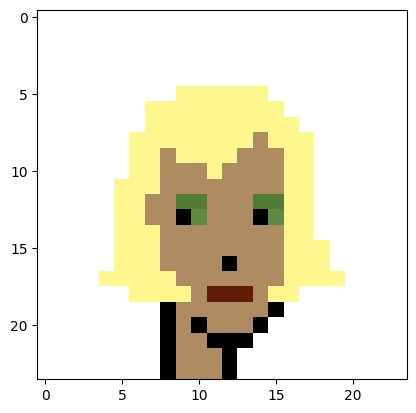

In [7]:
# Convert entire image to one hot encoded and back

one_hot_encoded_image = datasets.rgba_to_one_hot(image, mapper)
print(f"one hot encoded: {one_hot_encoded_image.shape}")

restored = datasets.one_hot_to_rgba(one_hot_encoded_image, mapper)
print(f"rgba encoded: {one_hot_encoded_image.shape}")

# Show an image after going to one hot encoding and back
plt.imshow(to_pil_image(restored))
plt.show()


In [8]:
# One Hot Dataset

dataset = datasets.OneHotEncodedImageDataset(mapper, test_size=2000)
print(f"dataset size:   {len(dataset)}")
print(f"  - train size: {len(dataset.train_idx)}")
print(f"  - test size:  {len(dataset.test_idx)}\n")

train_sampler = SubsetRandomSampler(dataset.train_idx)
print(f"train sampler:  {len(train_sampler)}")
print(f"  - sample id:  {next(iter(train_sampler))}\n")

test_sampler = SubsetRandomSampler(dataset.test_idx)
print(f"test sampler:   {len(test_sampler)}")
print(f"  - sample id:  {next(iter(test_sampler))}\n")

one_hot_ds = (dataset, train_sampler, test_sampler)


dataset size:   10000
  - train size: 8000
  - test size:  2000

train sampler:  8000
  - sample id:  2215

test sampler:   2000
  - sample id:  8160



# Train Model

In [9]:
# Model: Naive RGBA
# autoencoder = models.NaiveRGBAutoencoder()
# criterion = torch.nn.MSELoss()
# (dataset, train_sampler, test_sampler) = rgba_ds

# Model: Naive One Hot
# autoencoder = models.NaiveOneHotAutoencoder()
# criterion = torch.nn.MSELoss()
# (dataset, train_sampler, test_sampler) = one_hot_ds

# Model: Conv RGBA
# autoencoder = models.ConvRGBAutoencoder()
# criterion = torch.nn.MSELoss()
# (dataset, train_sampler, test_sampler) = rgba_ds

# Model: Conv One Hot
autoencoder = models.ConvOneHotAutoencoder()
criterion = torch.nn.CrossEntropyLoss()
(dataset, train_sampler, test_sampler) = one_hot_ds


In [10]:
# Prepare dataset

batch_size = 32

train_loader = DataLoader(
    dataset, batch_size=batch_size, sampler=train_sampler,
)

test_loader = DataLoader(
    dataset, batch_size=batch_size, sampler=test_sampler,
)

train_punk = next(iter(train_loader))
print(f"train punk: {train_punk.shape}")

test_punk = next(iter(test_loader))
print(f"test punk:  {test_punk.shape}")


train punk: torch.Size([32, 222, 24, 24])
test punk:  torch.Size([32, 222, 24, 24])


In [11]:
# Cue training montage

train_losses, test_losses = models.train(
    autoencoder, criterion, train_loader, test_loader,
    learn_rate=1e-3, epochs=5
)


epoch [1/5]
  - train loss: 1.0706090731620788
  - test loss:  0.2970140680434212
epoch [2/5]
  - train loss: 0.152654072239995
  - test loss:  0.07093060560642726
epoch [3/5]
  - train loss: 0.044281114369630815
  - test loss:  0.02605066962894939
epoch [4/5]
  - train loss: 0.017373810049146413
  - test loss:  0.0108388226612338
epoch [5/5]
  - train loss: 0.00770403213892132
  - test loss:  0.005436047364676755


In [12]:
# models.save(autoencoder, 'convoh.jms')


# Model Output to Image

In [13]:
# autoencoder = models.load('convoh-onehot-cross.jms')


In [14]:
# Reconstruct `train_punk`

print(train_punk.shape)

# one_hot_encoded_image = datasets.rgb_to_one_hot(train_punk, mapper)
reconstructed = autoencoder(train_punk)
print(reconstructed.shape)
image_batch = reconstructed.detach().cpu()
some_image = image_batch[0]

print(some_image.shape)
print(some_image)


torch.Size([32, 222, 24, 24])
torch.Size([32, 222, 24, 24])
torch.Size([222, 24, 24])
tensor([[[ 1.1389e+01,  9.6775e+00,  1.2429e+01,  ...,  2.1876e+01,
           1.4445e+01,  1.0551e+01],
         [ 1.1983e+01,  9.4942e+00,  8.7896e+00,  ...,  1.7457e+01,
           1.1874e+01,  1.3565e+01],
         [ 1.9108e+01,  1.5398e+01,  2.7642e+01,  ...,  4.2983e+01,
           2.0415e+01,  2.0748e+01],
         ...,
         [ 1.5838e+01,  1.4172e+01,  3.7227e+01,  ...,  5.3523e+01,
           1.7537e+01,  1.5893e+01],
         [ 1.0494e+01,  1.0626e+01,  1.8686e+01,  ...,  2.8655e+01,
           1.5625e+01,  1.0283e+01],
         [ 7.1412e+00,  8.7587e+00,  1.6522e+01,  ...,  2.3414e+01,
           1.6293e+01,  9.3041e+00]],

        [[-1.1194e-01,  1.7971e+00, -2.0455e+00,  ..., -8.9802e+00,
          -5.8956e+00, -4.2267e+00],
         [ 4.8774e+00, -3.9851e+00, -4.3807e+00,  ...,  5.8436e+00,
           4.5501e+00,  1.6868e+00],
         [-3.8155e+00, -2.3946e+01,  1.3461e+01,  ...,  2.

In [16]:
# From one hot back to 24x24 image with RGBA colors
one_hot_models = (models.ConvOneHotAutoencoder, models.NaiveOneHotAutoencoder)
if isinstance(autoencoder, one_hot_models):
    some_image = datasets.one_hot_to_rgba(some_image, mapper)
    print(some_image.shape)


torch.Size([4, 24, 24])


torch.float32


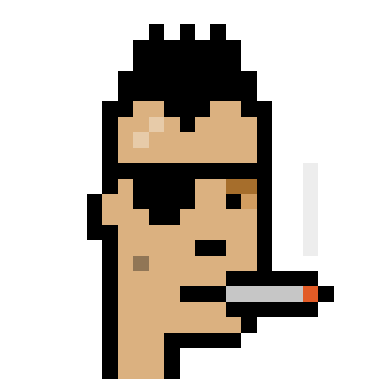

In [17]:
# print(type(some_image))
# pil_image = to_pil_image(torch.tensor(some_image))

# reconstructed = autoencoder(images.get_punk_tensor(0))

# pil_image = to_pil_image(reconstructed.clone().detach())
print(some_image.dtype)
pil_image = to_pil_image(some_image.clone().detach())

plt.imshow(pil_image)
plt.axis('off')
plt.show()



# Tests

In [18]:
train_losses


[1.0706090731620788,
 0.152654072239995,
 0.044281114369630815,
 0.017373810049146413,
 0.00770403213892132]

In [19]:
test_losses


[0.2970140680434212,
 0.07093060560642726,
 0.02605066962894939,
 0.0108388226612338,
 0.005436047364676755]

<function matplotlib.pyplot.show(close=None, block=None)>

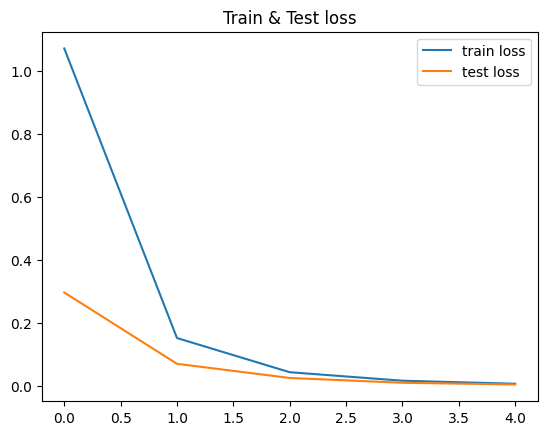

In [20]:
# plt.figure(figsize=(10,5))
plt.title("Train & Test loss")
plt.plot(train_losses, label='train loss')
plt.plot(test_losses, label='test loss')
plt.legend()
plt.show
